In [112]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

## Reading the data



In [113]:
lead_data = pd.read_csv('Leads.csv')
lead_data.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Inspecting the data


In [114]:
lead_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [115]:
lead_data.shape

(9240, 37)

We have null values in multiple columns


In [116]:
lead_data.isnull().sum()




Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

<Axes: >

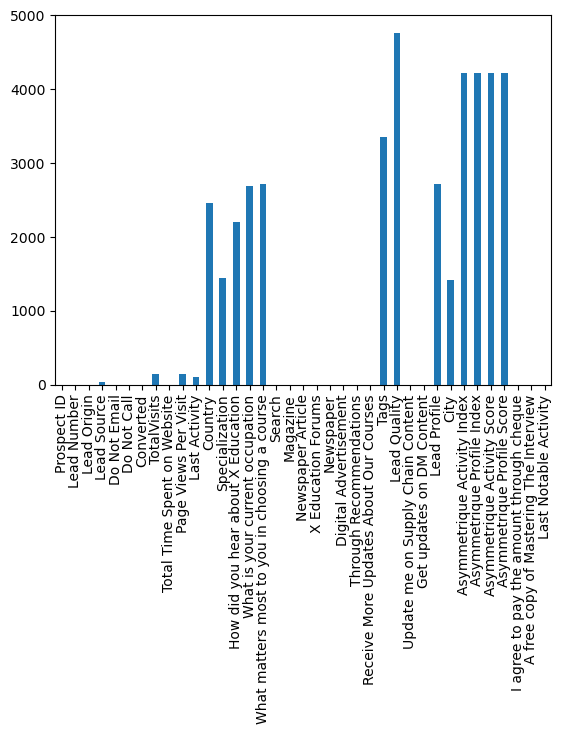

In [117]:
lead_data.isnull().sum().plot(kind='bar')


In [118]:
lead_data.describe()



,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Cleaning Data

In [119]:
# Converting each and every value to lower case in lead_data
lead_data  = lead_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [120]:
select_cols = lead_data.apply(lambda x: x.astype(str).str.contains('select', case=False).any())
print("Columns containing 'Select' values:")
print(select_cols[select_cols].index.tolist())

Columns containing 'Select' values:
['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [121]:
# Converting "Select" values to NaN since they represent no selection/missing data

lead_data = lead_data.replace("select", np.nan)

In [122]:
# Get columns with only 1 unique value
single_value_cols = lead_data.nunique()[lead_data.nunique() == 1].index

single_value_cols

Index(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],
      dtype='object')

We can drop these columns as there values are irrelavant 

In [123]:
# Drop those columns
lead_data = lead_data.drop(columns=single_value_cols)

lead_data.shape

(9240, 32)

In [124]:
#checking the percentage missing values in every column
missing_percentages = (lead_data.isnull().sum() / len(lead_data)) * 100
print("Percentage of missing values in each column:")
print(missing_percentages)

Percentage of missing values in each column:
Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search     

In [125]:
# Dropping the columns having more than 35% of NAN values 
columns_to_drop = missing_percentages[missing_percentages > 35].index
print(columns_to_drop)
lead_data = lead_data.drop(columns=columns_to_drop)


Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


In [126]:
# Filling the remaining columns with default values
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].fillna('NA')
lead_data['Country'] = lead_data['Country'].fillna('NA')
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].fillna('NA')

In [127]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [128]:
# Checking the coutries 
lead_data["Country"].value_counts()

Country
india                   6492
NA                      2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switze

We can convert this into 3 categories india, NA and outside india

In [129]:
lead_data["Country"].value_counts(normalize = True)

Country
india                   0.702597
NA                      0.266342
united states           0.007468
united arab emirates    0.005736
singapore               0.002597
saudi arabia            0.002273
united kingdom          0.001623
australia               0.001407
qatar                   0.001082
bahrain                 0.000758
hong kong               0.000758
oman                    0.000649
france                  0.000649
unknown                 0.000541
kuwait                  0.000433
south africa            0.000433
canada                  0.000433
nigeria                 0.000433
germany                 0.000433
sweden                  0.000325
philippines             0.000216
uganda                  0.000216
italy                   0.000216
bangladesh              0.000216
netherlands             0.000216
asia/pacific region     0.000216
china                   0.000216
belgium                 0.000216
ghana                   0.000216
kenya                   0.000108
sr

In [130]:
def categorize_country(country):
    if country == 'india':
        return 'india'
    elif country == 'NA':
        return 'NA' 
    else:
        return 'out of india'

lead_data['Country'] = lead_data['Country'].str.lower()
lead_data['Country'] = lead_data['Country'].apply(categorize_country)

In [131]:
lead_data = lead_data[lead_data.isnull().sum(axis=1) <1]

In [132]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [133]:
lead_data = lead_data.drop('Prospect ID', axis=1)

In [134]:
lead_data.shape


(9074, 21)

# Exploratory Data Analysis

## Univariate Analysis

### Categorical Variables

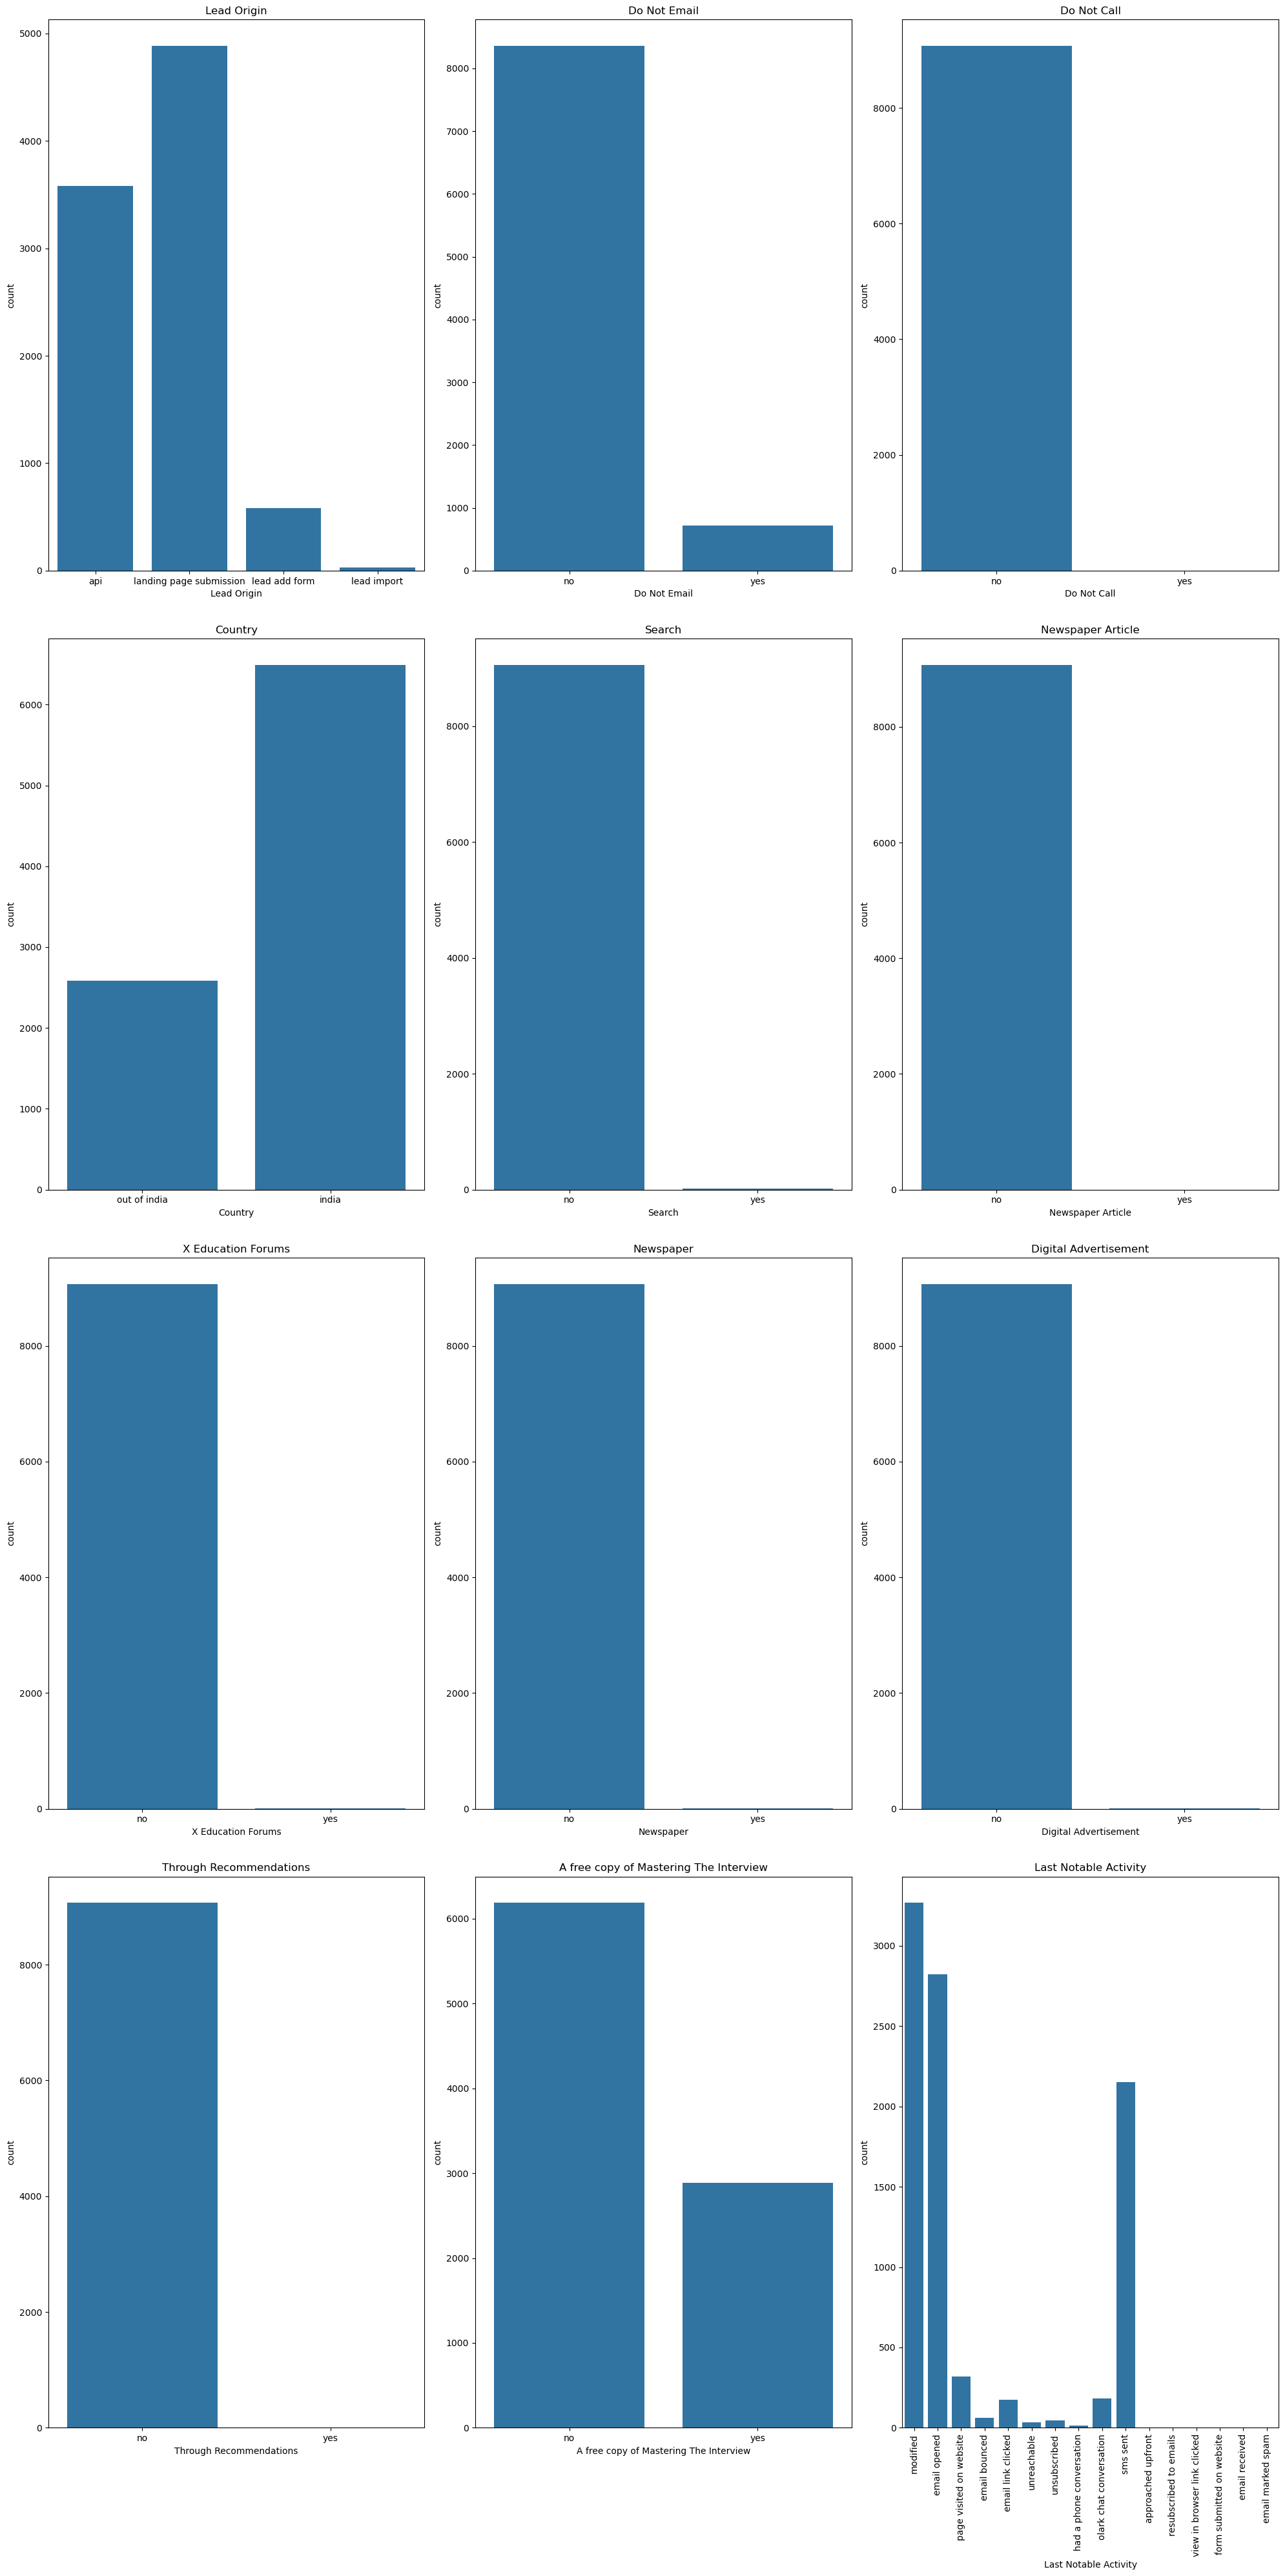

In [135]:
# Set figure size
plt.figure(figsize=(20, 40))

# Define categorical variables to plot
categorical_vars = [
    ('Lead Origin', None),
    ('Do Not Email', None), 
    ('Do Not Call', None),
    ('Country', None),
    ('Search', None),
    ('Newspaper Article', None),
    ('X Education Forums', None),
    ('Newspaper', None), 
    ('Digital Advertisement', None),
    ('Through Recommendations', None),
    ('A free copy of Mastering The Interview', None),
    ('Last Notable Activity', 90)
]

# Create subplots in a 4x3 grid
for idx, (var, rotation) in enumerate(categorical_vars, 1):
    plt.subplot(4, 3, idx)
    sns.countplot(data=lead_data, x=var)
    plt.title(var)
    if rotation:
        plt.xticks(rotation=rotation)
    
    # Adjust layout to prevent overlapping
    plt.tight_layout(h_pad=3, w_pad=1)

plt.show()

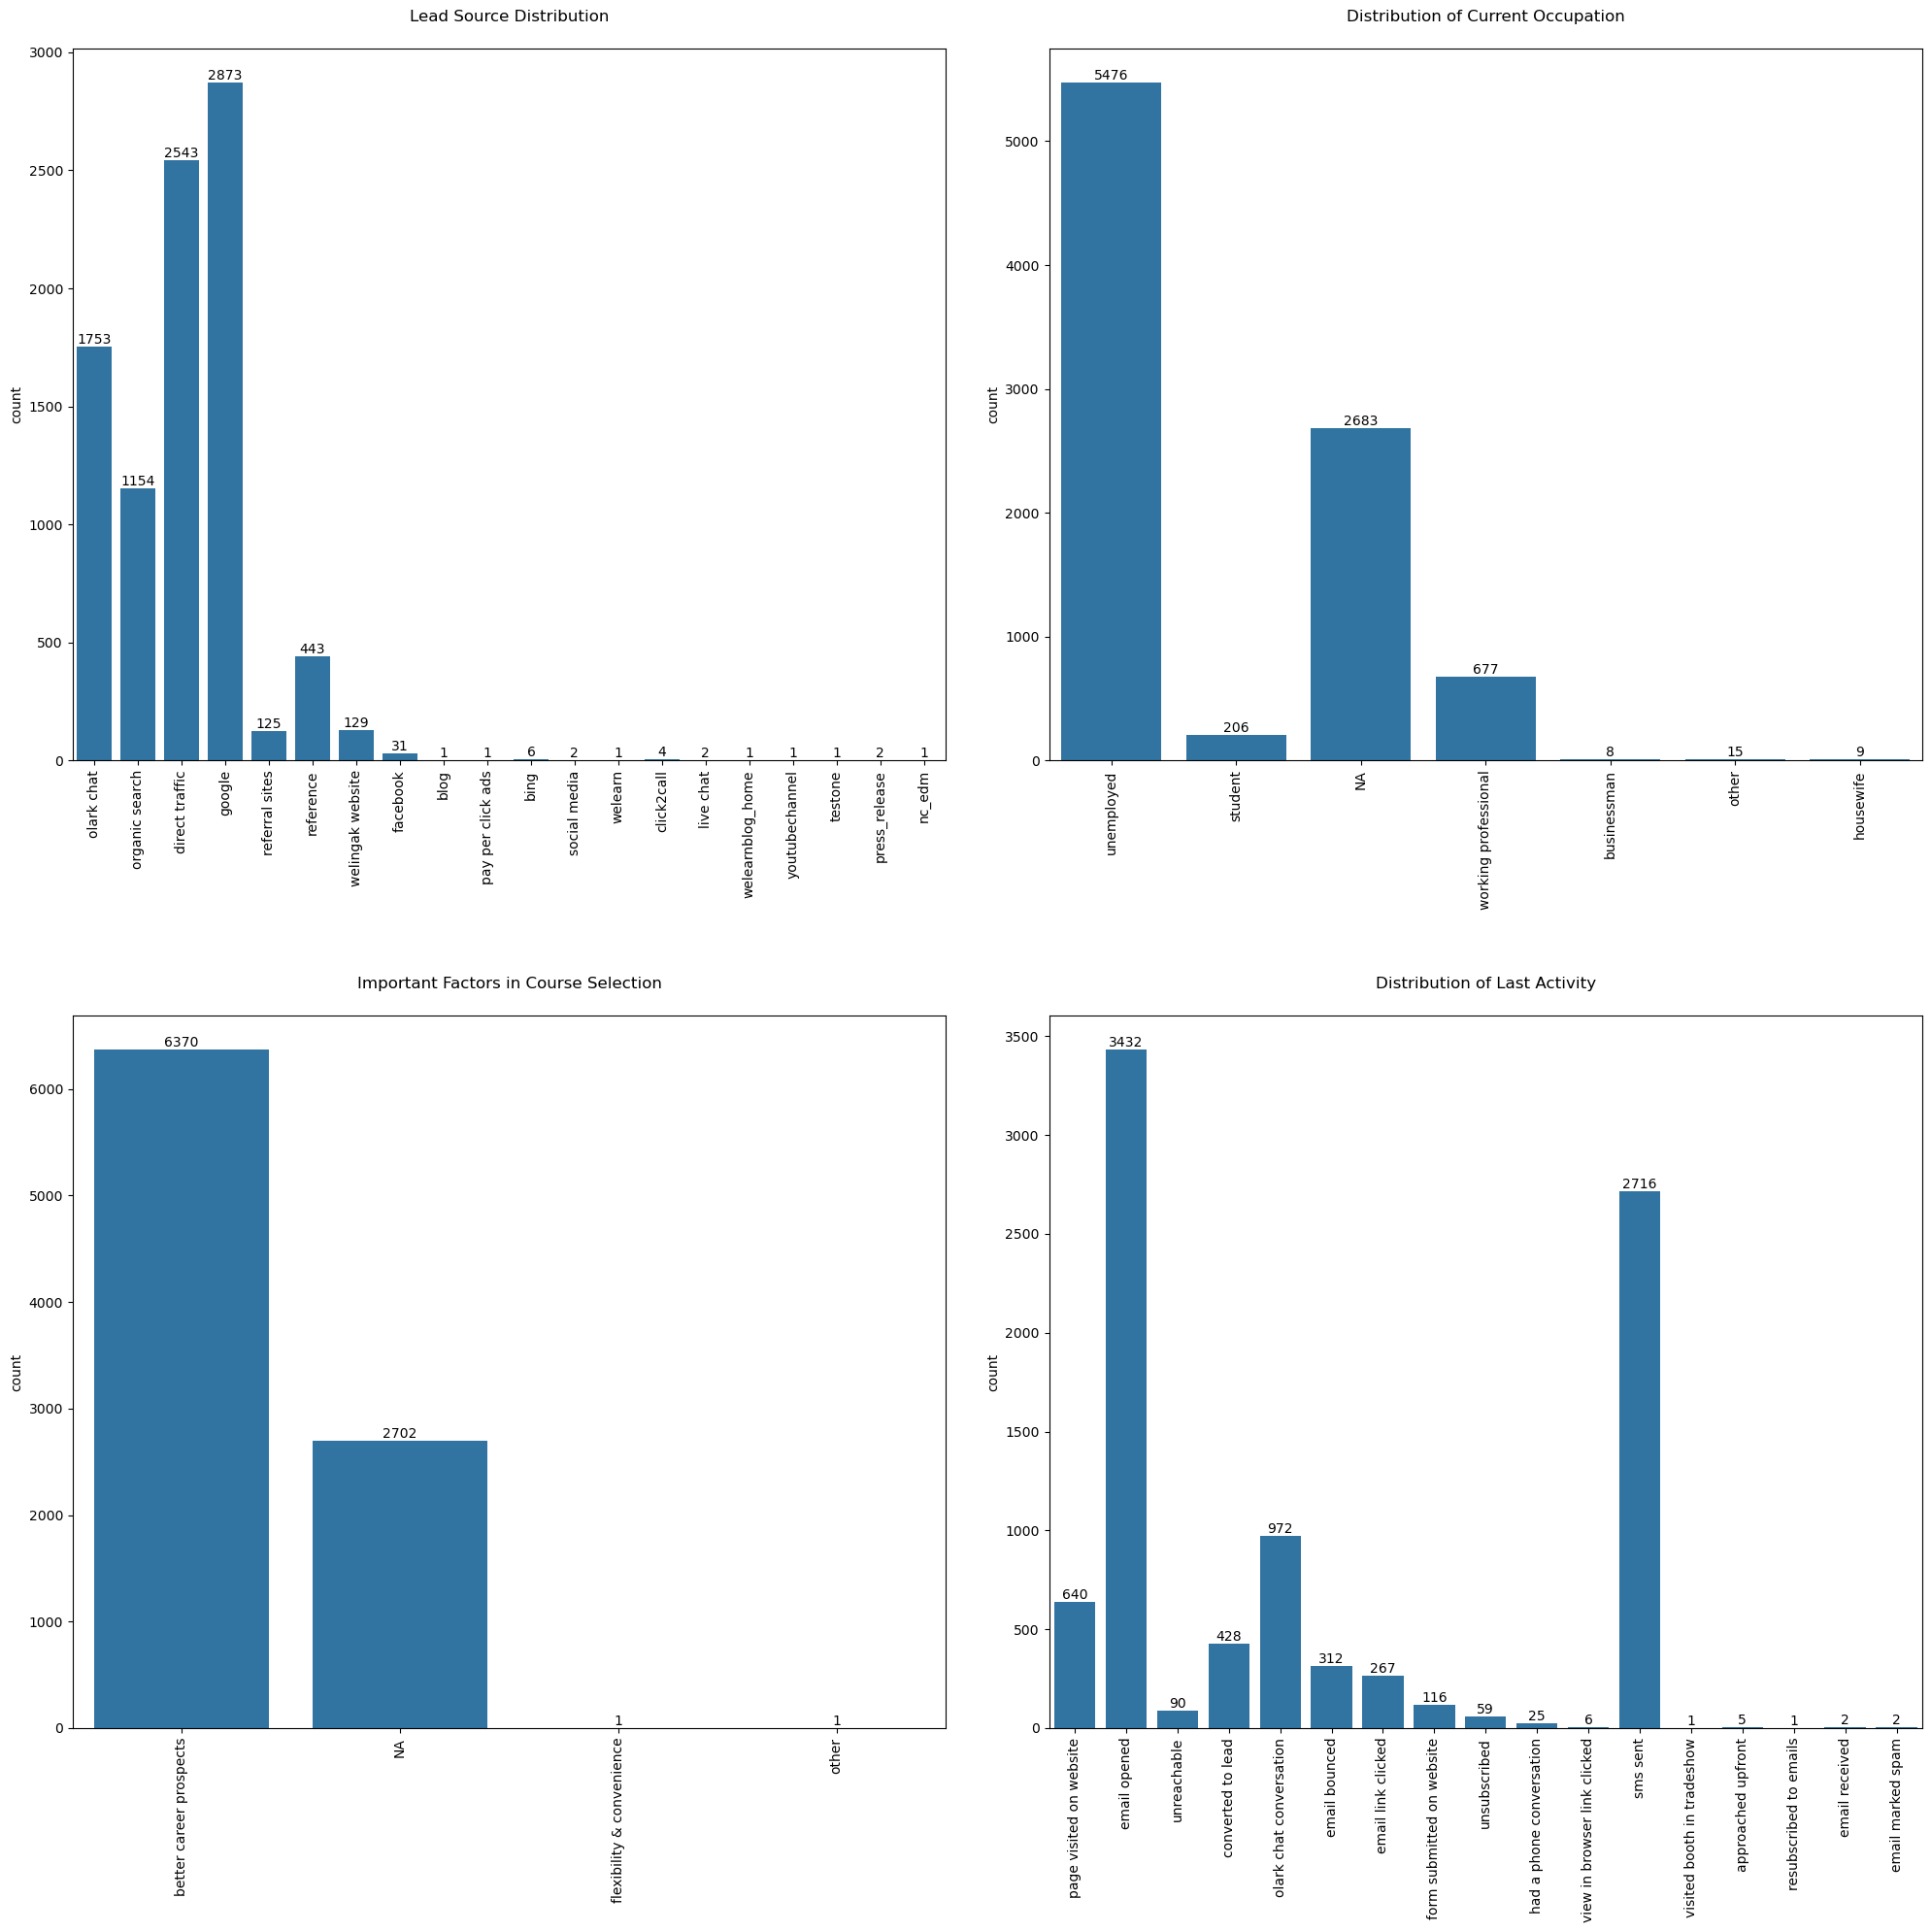

In [136]:
# Create figure with subplots for categorical variables
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Define variables to plot
plot_vars = [
    ('Lead Source', 'Lead Source Distribution'),
    ('What is your current occupation', 'Distribution of Current Occupation'), 
    ('What matters most to you in choosing a course', 'Important Factors in Course Selection'),
    ('Last Activity', 'Distribution of Last Activity')
]

# Create subplots
for idx, (var, title) in enumerate(plot_vars):
    row = idx // 2
    col = idx % 2
    
    # Create countplot
    sns.countplot(data=lead_data, x=var, ax=axes[row, col])
    
    # Customize plot
    axes[row, col].set_title(title, pad=20, fontsize=12)
    axes[row, col].tick_params(axis='x', rotation=90)
    axes[row, col].set_xlabel('')
    
    # Add value labels on top of bars
    for p in axes[row, col].patches:
        axes[row, col].annotate(f'{int(p.get_height())}', 
                              (p.get_x() + p.get_width()/2., p.get_height()),
                              ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout(h_pad=5, w_pad=3)
plt.show()

### 3.1.2 Numerical Variables

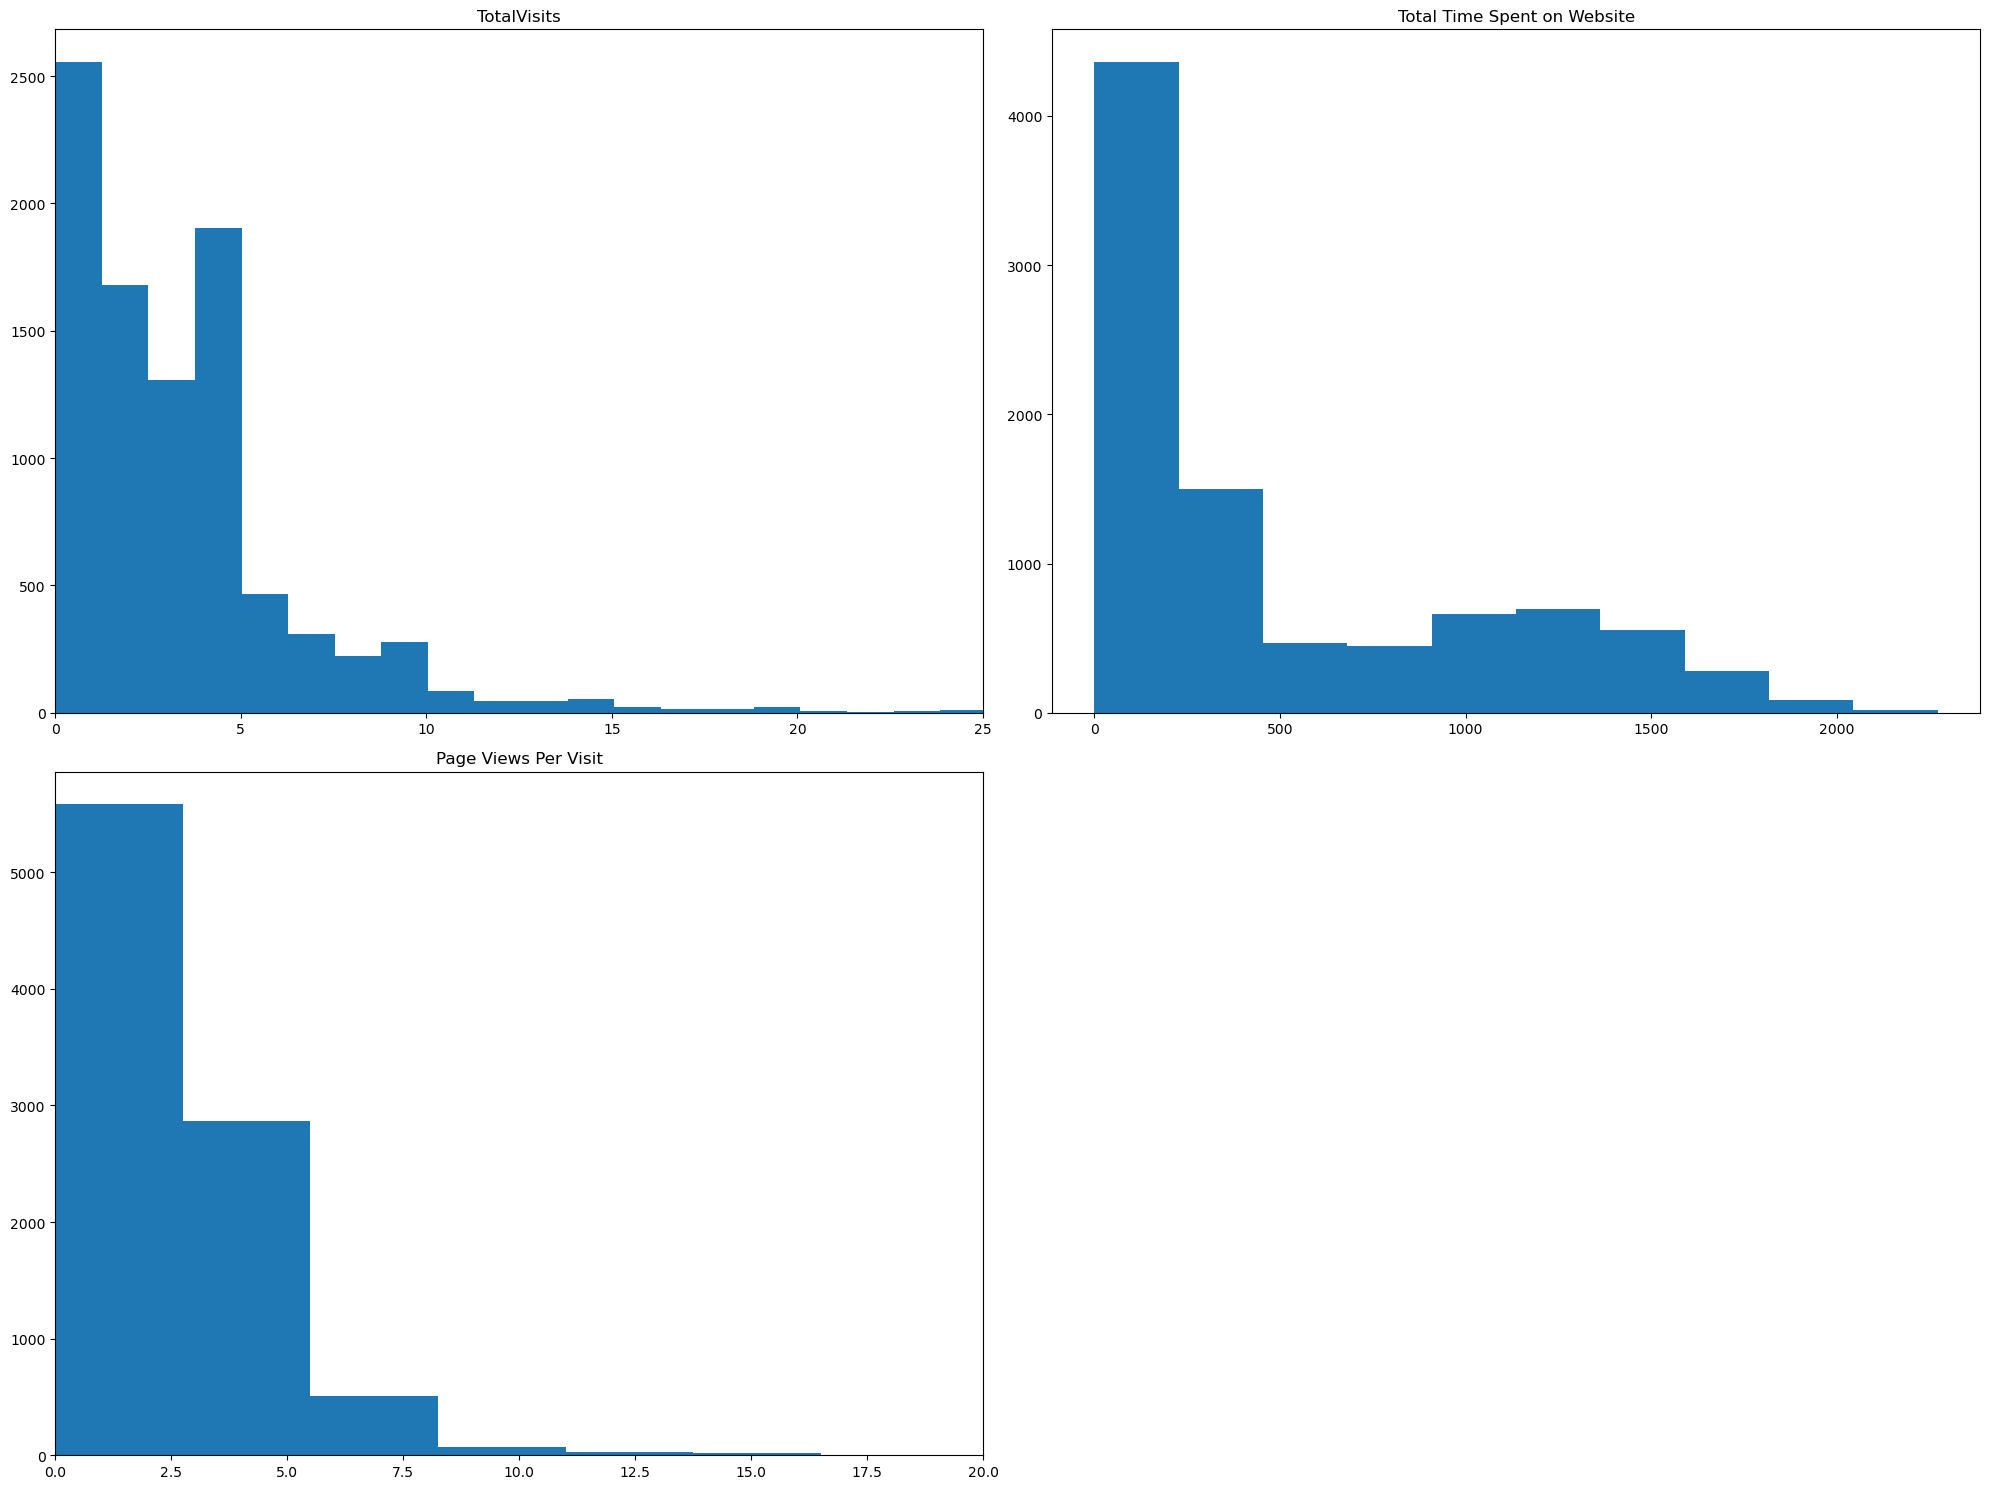

In [137]:
# Create figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Define variables and their plot settings
plot_vars = [
    ('TotalVisits', {'bins': 200, 'xlim': (0, 25)}),
    ('Total Time Spent on Website', {'bins': 10}),
    ('Page Views Per Visit', {'bins': 20, 'xlim': (0, 20)})
]

# Create histograms
for idx, (var, settings) in enumerate(plot_vars):
    row = idx // 2
    col = idx % 2
    
    # Plot histogram
    axes[row, col].hist(lead_data[var], bins=settings.get('bins'))
    axes[row, col].set_title(var)
    
    # Set xlim if specified
    if 'xlim' in settings:
        axes[row, col].set_xlim(*settings['xlim'])

# Remove empty subplot
axes[1, 1].remove()

plt.tight_layout()
plt.show()

## 3.2 Categorical variables based on Target variable

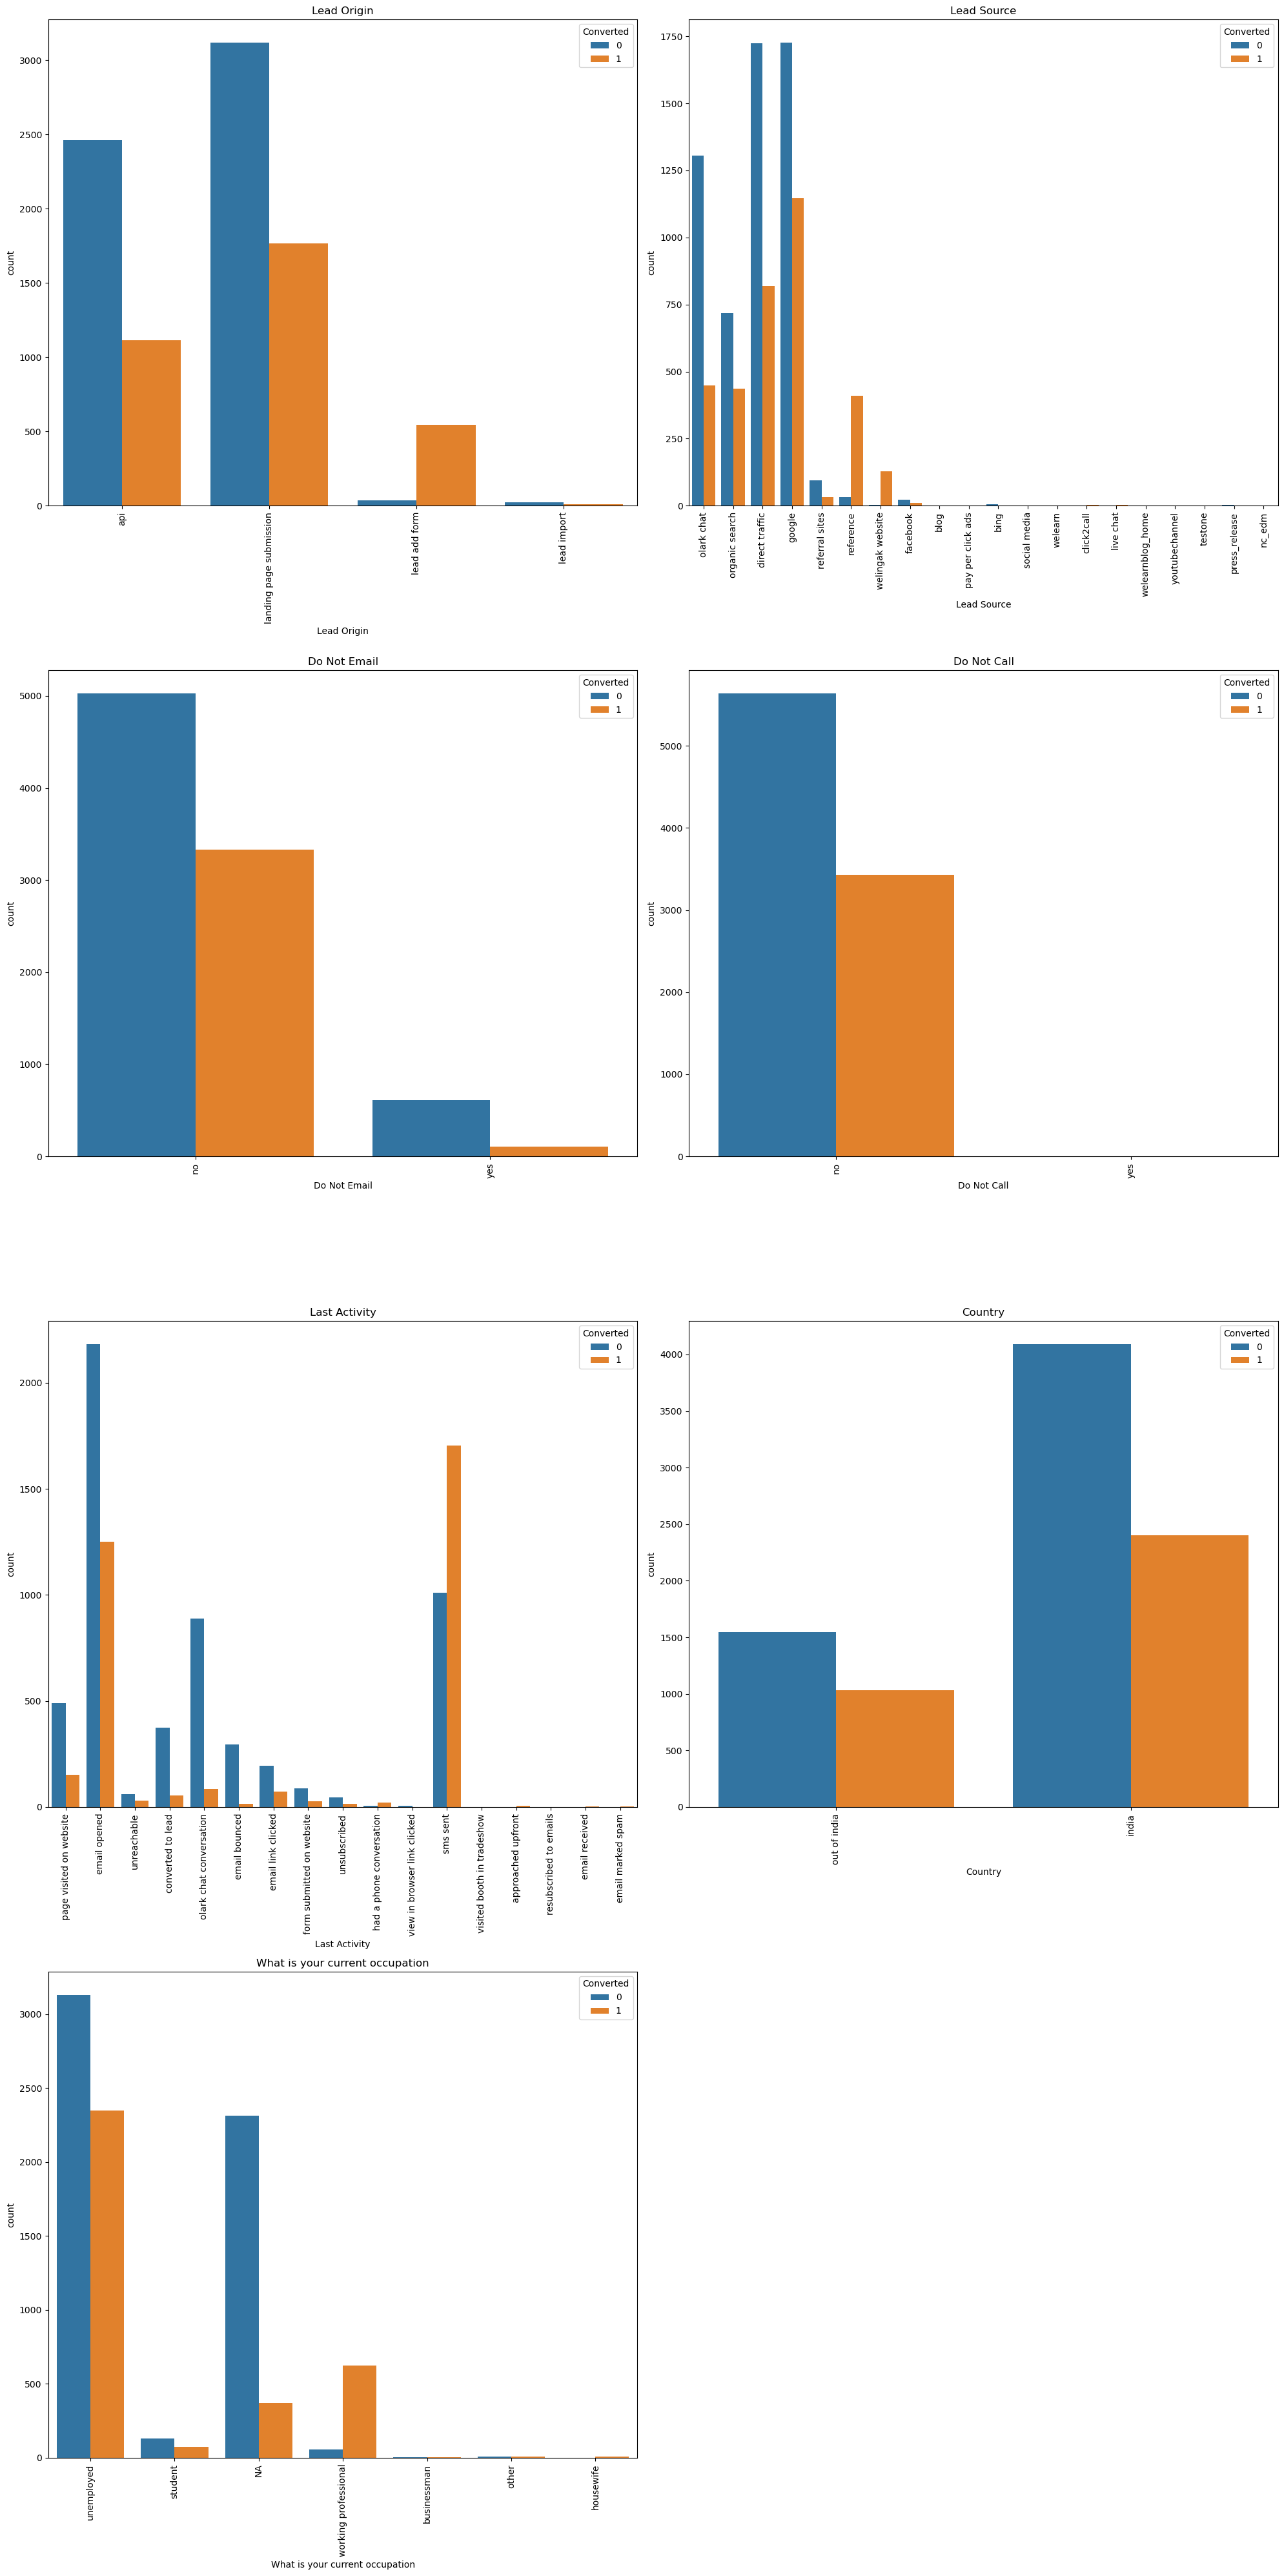

In [138]:
# Create figure and subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 40))
axes = axes.flatten()

# Define variables and their titles
variables = [
    'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
    'Last Activity', 'Country', 'What is your current occupation'
]

# Create countplots
for idx, var in enumerate(variables):
    sns.countplot(data=lead_data, x=var, hue='Converted', ax=axes[idx])
    axes[idx].set_title(var)
    axes[idx].tick_params(axis='x', rotation=90)

# Remove empty subplot
axes[-1].remove()

plt.tight_layout()
plt.show()

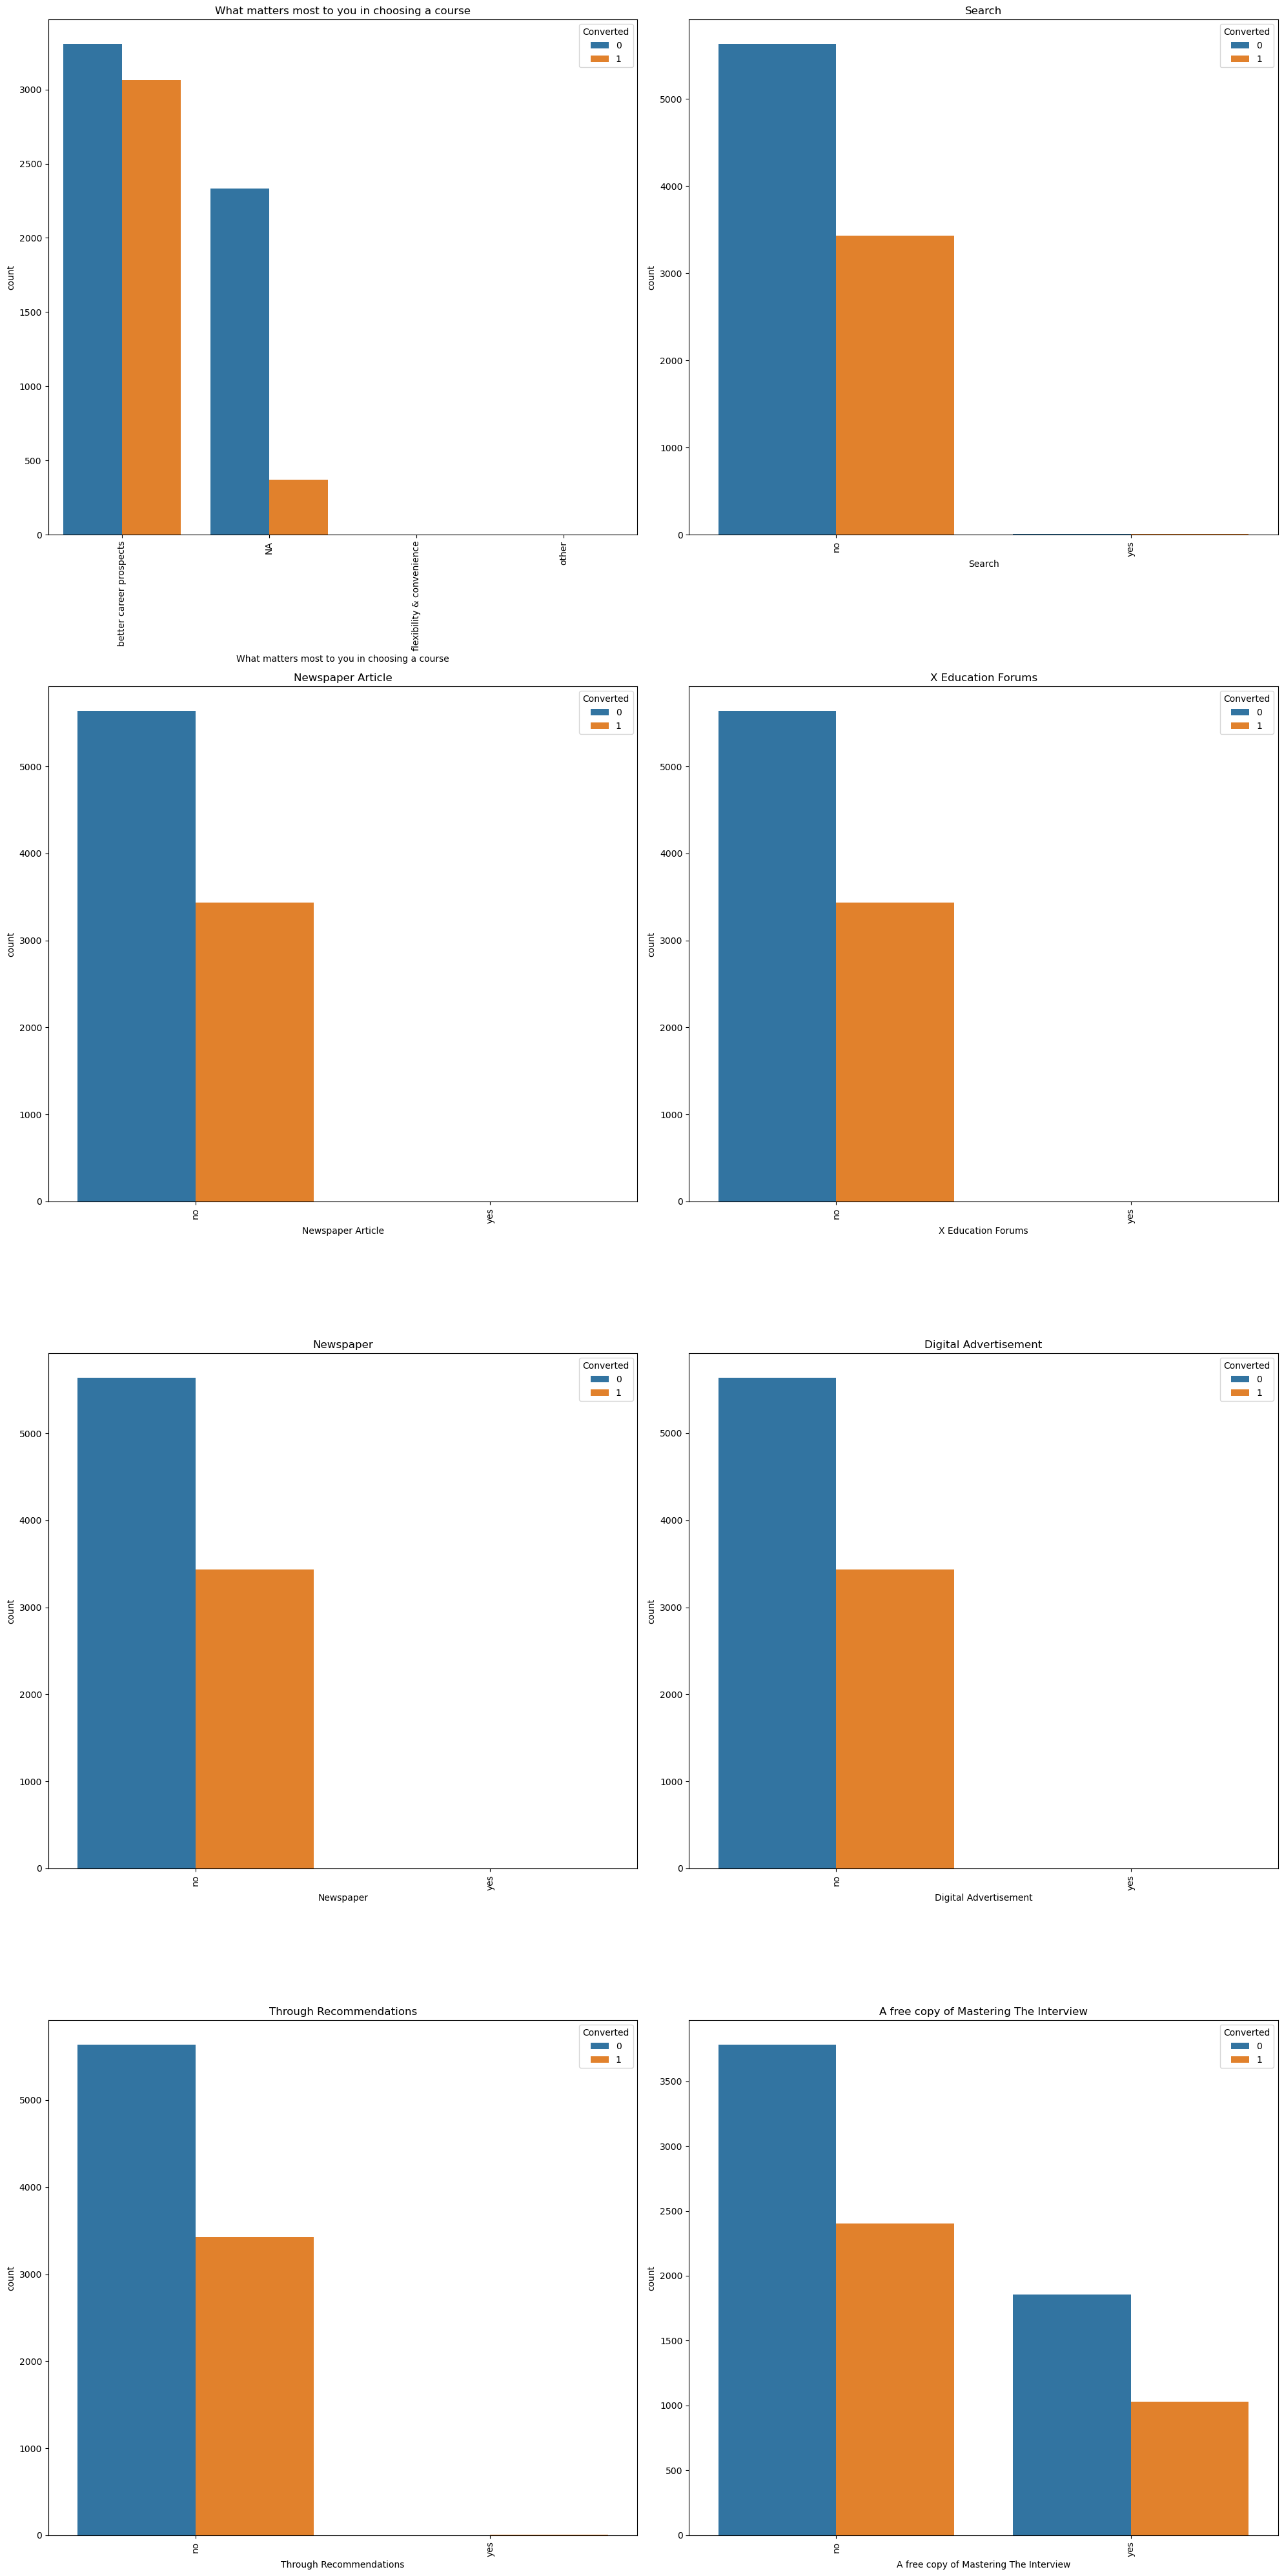

In [139]:
# Create figure and subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 40))

# Define variables and their titles 
variables = [
    'What matters most to you in choosing a course',
    'Search',
    'Newspaper Article', 
    'X Education Forums',
    'Newspaper',
    'Digital Advertisement',
    'Through Recommendations',
    'A free copy of Mastering The Interview'
]

# Create countplots
for idx, var in enumerate(variables):
    row = idx // 2
    col = idx % 2
    sns.countplot(data=lead_data, x=var, hue='Converted', ax=axes[row, col])
    axes[row, col].set_title(var)
    axes[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

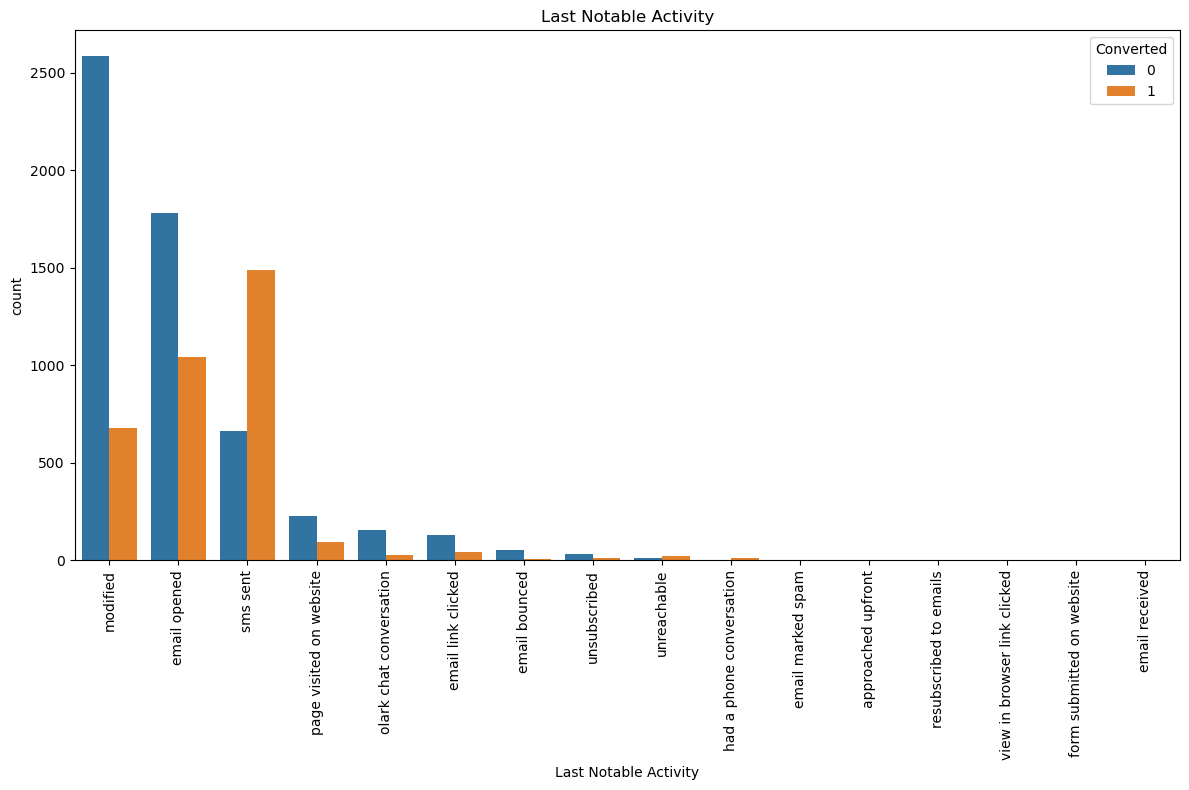

In [140]:
# Create optimized plot for 'Last Notable Activity'
fig = plt.figure(figsize=(12, 8))
ax = sns.countplot(data=lead_data, 
                  x='Last Notable Activity',
                  hue='Converted',
                  order=lead_data['Last Notable Activity'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Last Notable Activity')
plt.tight_layout()
plt.show()

# 4. Creating Dummy variables

In [141]:
# Get column names of all columns with 'object' (string) data type
# This helps identify categorical variables that need to be converted to dummy variables
lead_data.loc[:, lead_data.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [142]:
# Creating dummy variables using get_dummies and dropping first column for each categorical variable
categorical_columns = [
    'Lead Origin',
    'Lead Source', 
    'Do Not Email',
    'Last Activity',
    'What is your current occupation',
    'A free copy of Mastering The Interview',
    'Last Notable Activity'
]
dummies = pd.get_dummies(lead_data[categorical_columns], drop_first=True)

In [143]:
# Concating the dummies to the dataframe.
# Creating new dataframe "dummy_lead_data"
dummy_lead_data = pd.concat([lead_data, dummies], axis=1)
dummy_lead_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,False,False,True,False,False,False,False,False,False,False
1,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,...,False,False,False,False,False,False,False,False,False,False
2,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,False,False,False,False,False,False,False,False,False,False
3,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,False,False,True,False,False,False,False,False,False,False
4,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,False,False,True,False,False,False,False,False,False,False


In [144]:
# Define columns to drop - these are the original categorical columns that we created dummies for,
# plus other columns we don't need for modeling
columns_to_drop = [
    # Original categorical columns that were dummy encoded
    'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity',
    'What is your current occupation', 'A free copy of Mastering The Interview',
    'Last Notable Activity',
    
    # Other unused columns
    'Country',
    'What matters most to you in choosing a course',
    'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
    'Digital Advertisement', 'Through Recommendations'
]

# Drop the columns and update dummy_lead_data
dummy_lead_data = dummy_lead_data.drop(columns=columns_to_drop, axis=1)

In [145]:
dummy_lead_data.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,660737,0,0.0,0,0.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,660728,0,5.0,674,2.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,660727,1,2.0,1532,2.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,660719,0,1.0,305,1.0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,660681,1,2.0,1428,1.0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [146]:
# Convert all True to 1 and False to 0 in dummy_lead_data
dummy_lead_data = dummy_lead_data.astype(int)
dummy_lead_data.head()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,660737,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,5,674,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2,1532,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,1,305,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,1,2,1428,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Test-Train Split

In [147]:
# Importing the train_test_split from sklearn library
from sklearn.model_selection import train_test_split

In [148]:
# Create feature matrix X by dropping the target variable 'Converted'
# axis=1 specifies we want to drop a column rather than a row
X = dummy_lead_data.drop(['Converted'], axis=1)

# Display first 5 rows of feature matrix to verify the structure
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,660737,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,5,674,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,2,1532,2,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,660719,1,305,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,660681,2,1428,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [149]:
# Create target variable y by extracting the 'Converted' column from dummy_lead_data
# This will be used as the dependent variable in our model
y = dummy_lead_data['Converted']

# Display first 5 rows of target variable to verify the structure
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int32

In [150]:
# Splitting the dataset into 70% and 30% for train and test datasets respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [151]:
# Importing  MinMax scaler from sklearn
from sklearn.preprocessing import MinMaxScaler

In [152]:
# Initialize the MinMaxScaler for feature scaling
scaler = MinMaxScaler()

# Define the numeric columns to scale
numeric_columns = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

# Fit the scaler to the data and transform the numeric columns
# This scales all values to be between 0 and 1 while preserving the shape of the original distribution
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

# Display first 5 rows of scaled dataset to verify the transformation
X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,646334,0.014184,0.612676,0.083333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3604,625970,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,607128,0.042553,0.751761,0.250000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,590921,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,591639,0.014184,0.787852,0.083333,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


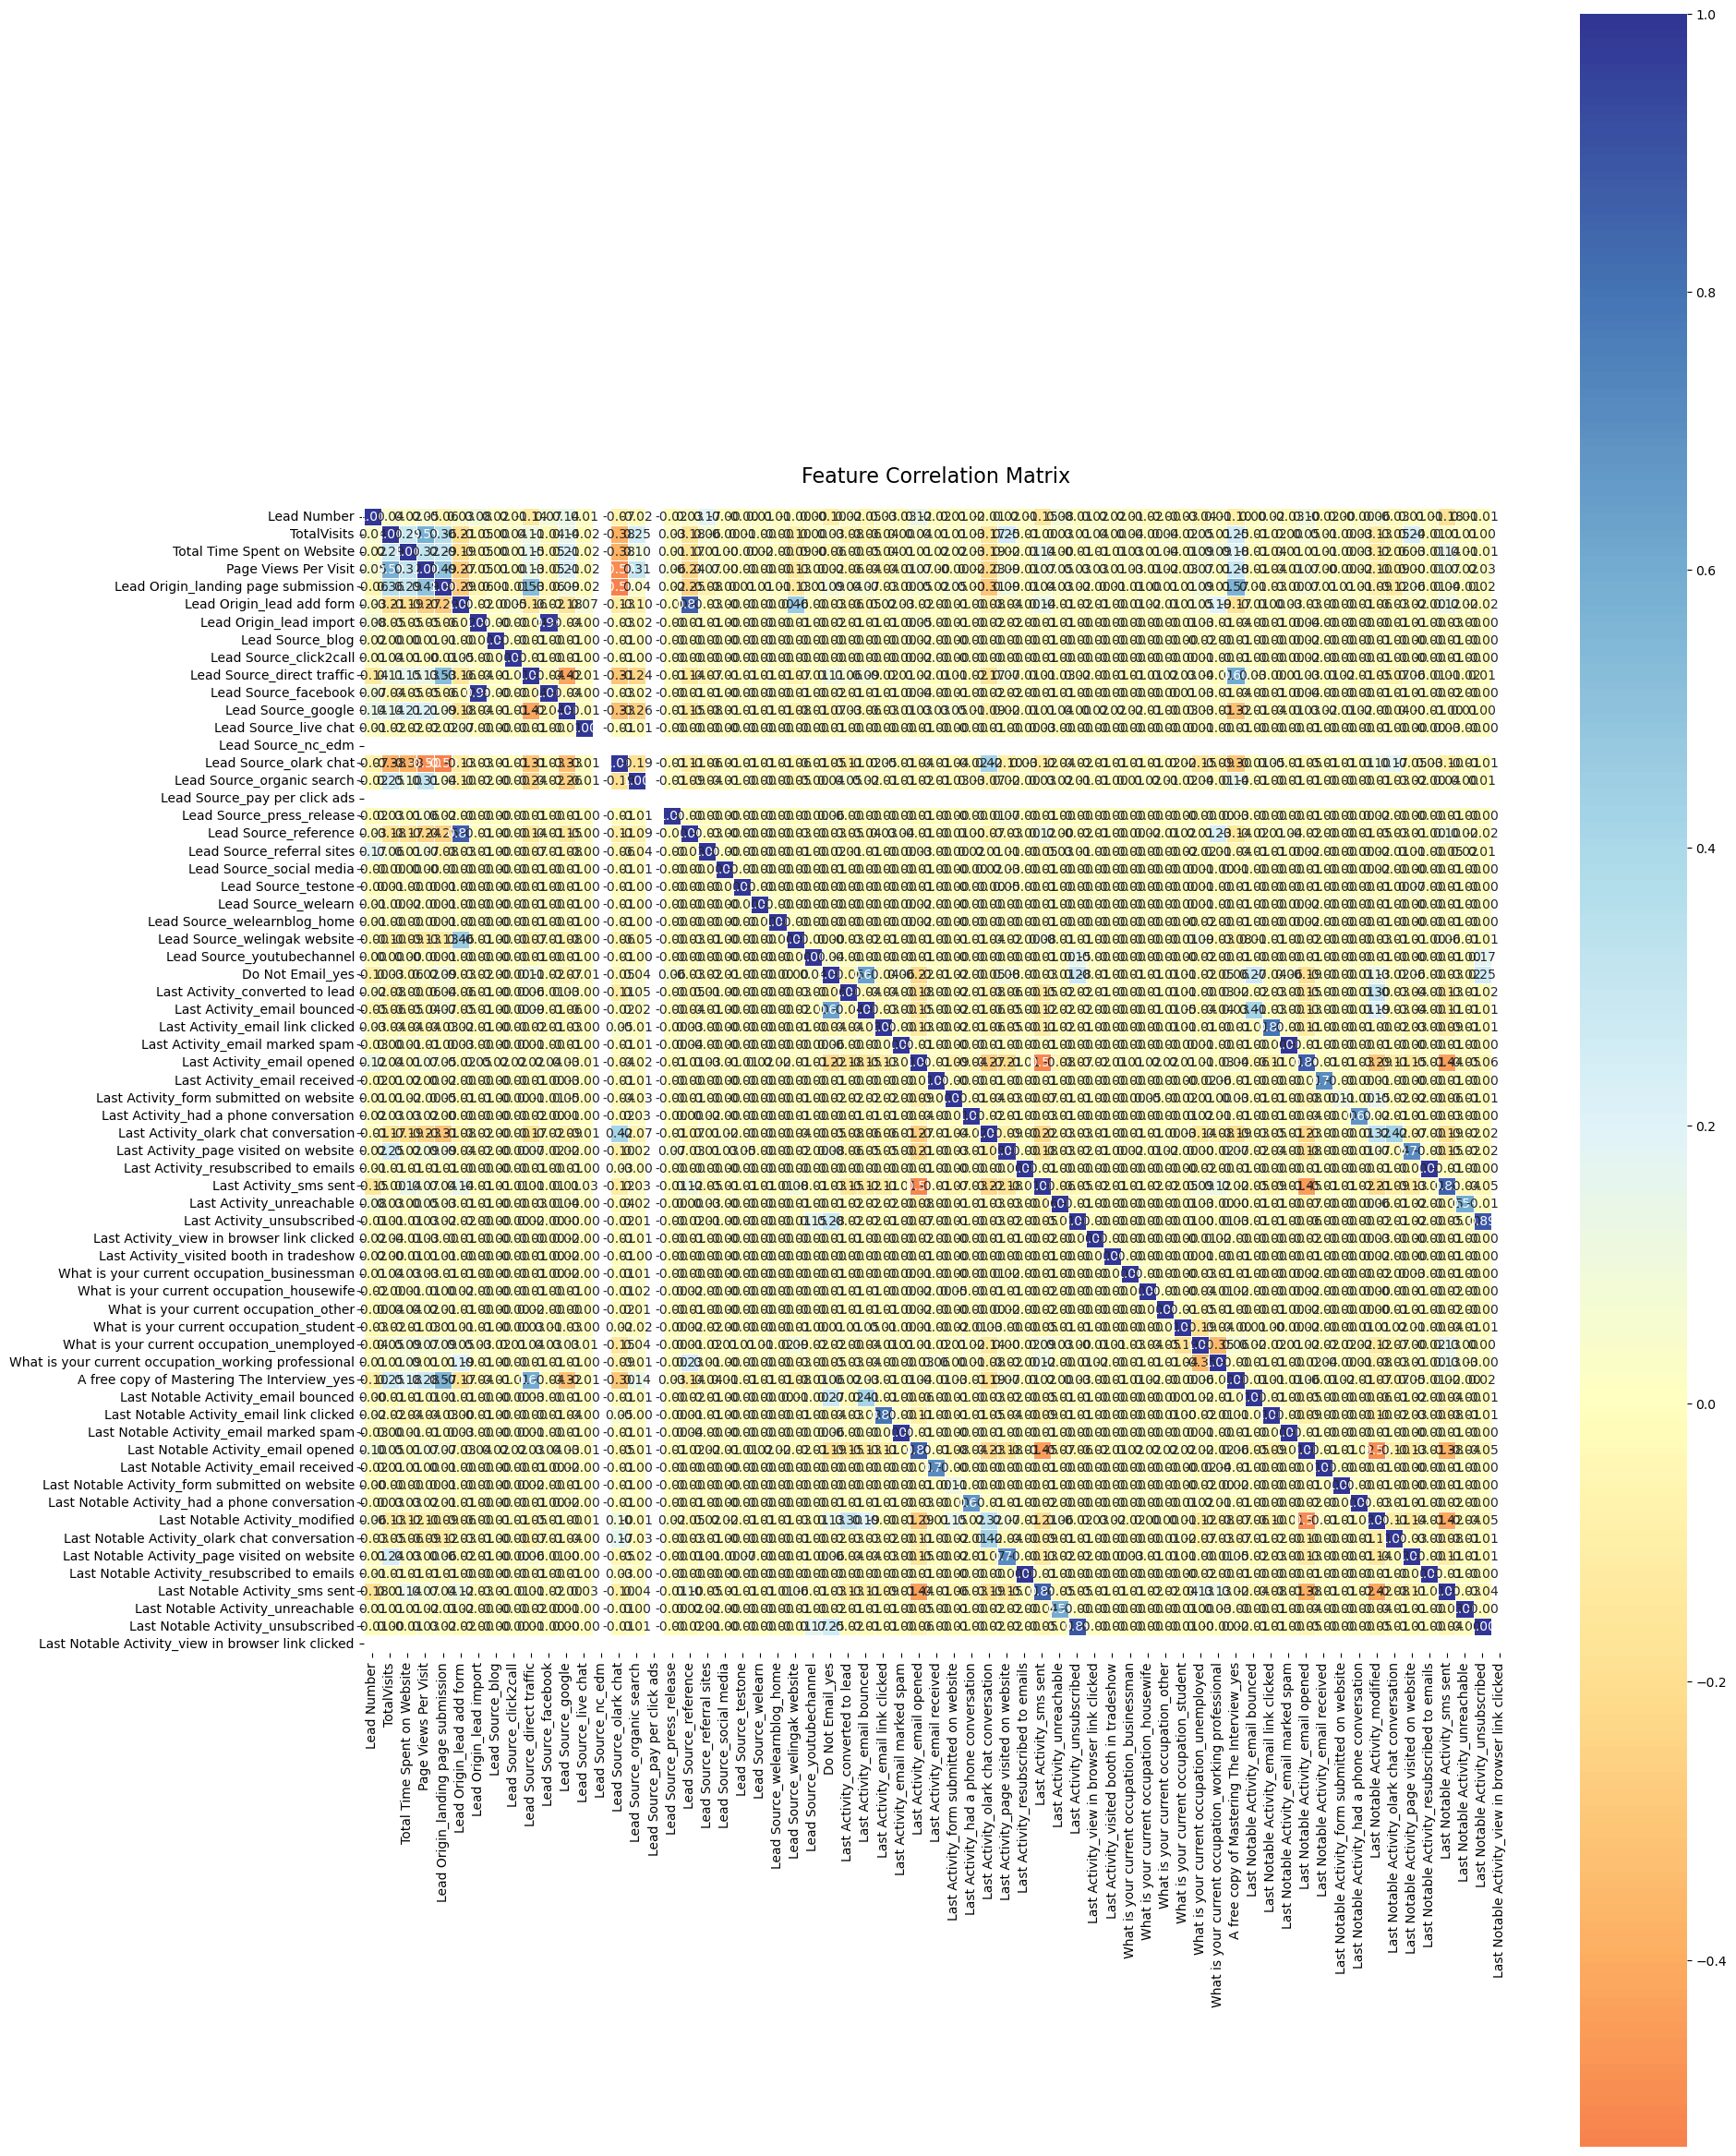

In [153]:
# Create a correlation matrix heatmap to visualize relationships between features
# This helps identify potential multicollinearity issues and important feature correlations

# Set up the matplotlib figure with a large size for better readability
plt.figure(figsize=(20,30))

sns.heatmap(X_train.corr(), 
            cmap='RdYlBu',
            annot=True,
            fmt='.2f',
            center=0,
            linewidths=0.5,
            square=True)

# Add title to the plot
plt.title('Feature Correlation Matrix', pad=20, fontsize=16)

# Display the plot
plt.show()

In [154]:
X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,646334,0.014184,0.612676,0.083333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3604,625970,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,607128,0.042553,0.751761,0.250000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,590921,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,591639,0.014184,0.787852,0.083333,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Model creation 

In [155]:
# Importing 'LogisticRegression' from sklearn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [156]:
# Importing RFE from sklearn
from sklearn.feature_selection import RFE

In [157]:
# Running RFE with 15 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [158]:
# Features that have been selected by RFE are
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 48),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_landing page submission', False, 30),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 27),
 ('Lead Source_blog', False, 29),
 ('Lead Source_click2call', False, 46),
 ('Lead Source_direct traffic', True, 1),
 ('Lead Source_facebook', False, 28),
 ('Lead Source_google', True, 1),
 ('Lead Source_live chat', False, 37),
 ('Lead Source_nc_edm', False, 49),
 ('Lead Source_olark chat', False, 19),
 ('Lead Source_organic search', True, 1),
 ('Lead Source_pay per click ads', False, 50),
 ('Lead Source_press_release', False, 36),
 ('Lead Source_reference', False, 18),
 ('Lead Source_referral sites', False, 4),
 ('Lead Source_social media', False, 21),
 ('Lead Source_testone', False, 26),
 ('Lead Source_welearn', False, 32),
 ('Lead Source_welearnblog_home', False, 34),
 ('Lead Source_welingak website', True, 1),
 ('Lea

In [159]:
# Put all the columns selected by RFE in the variable 'cols'
cols = X_train.columns[rfe.support_]

In [160]:
# Selecting columns selected by RFE
X_train = X_train[cols]

In [161]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_google,Lead Source_organic search,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_working professional,Last Notable Activity_had a phone conversation,Last Notable Activity_unreachable
1289,0.014184,0.612676,0,0,1,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0
5584,0.042553,0.751761,0,0,0,1,0,1,0,0,0,0,0,0,0
7679,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0,0,0,1,0,1,0,0,0,0,0,0,0


## First Model

In [162]:
import statsmodels.api as sm

In [163]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model1 = logm1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Sat, 16 Nov 2024   Deviance:                       5482.6
Time:                        18:31:36   Pearson chi2:                 6.64e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3758
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2524      0.081    -15.450      0.000      -1.411      -1.094
TotalVisits                                              4.5519      1.398      3.256      0.001       1.812       7.292
Total Time Spent on Website                              4.5660      0.162     28.101      0.000       4.248       4.884
Lead Origin_lead add form                                2.6773      0.225     11.916      0.000       2.237       3.118
Lead Source_direct traffic                              -1.4795      0.114    -12.979      0.000      -1.703      -1.256
Lead Source_google                                      -1.1705      0.109    -10.690      0.000      -1.385      -0.956
Lead Source_organic search                              -1.2823      0.134     -9.541      0.000      -1.546      -1.019
Lead Source_welingak website                             2.5984      1.033      2.515      0.012       0.573       4.624
Do Not Email_yes                                        -1.4076      0.168     -8.387      0.000      -1.737      -1.079
Last Activity_olark chat conversation                   -1.4678      0.165     -8.874      0.000      -1.792      -1.144
Last Activity_sms sent                                   1.3213      0.073     18.222      0.000       1.179       1.463
What is your current occupation_housewife               24.4759   3.07e+04      0.001      0.999   -6.01e+04    6.01e+04
What is your current occupation_other                    1.4134      0.760      1.859      0.063      -0.077       2.904
What is your current occupation_working professional     2.8071      0.193     14.509      0.000       2.428       3.186
Last Notable Activity_had a phone conversation          24.2053   2.18e+04      0.001      0.999   -4.28e+04    4.28e+04
Last Notable Activity_unreachable                        1.7029      0.610      2.790      0.005       0.507       2.899
========================================================================================================================
"""

In [164]:
# Importing 'variance_inflation_factor' from 'statsmodels' library.
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_df_vif(local_df):
    df_vif = pd.DataFrame()
    df_vif['Features'] = local_df.columns
    df_vif['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    df_vif['VIF'] = round(df_vif['VIF'], 2)
    df_vif = df_vif.sort_values(by='VIF', ascending=False)
    df_vif = df_vif.reset_index(drop=True)
    return df_vif

In [165]:
# Calculating the VIF
get_df_vif(X_train_sm)

,Features,VIF
0,const,6.80
1,Lead Source_google,2.32
2,Lead Source_direct traffic,2.30
3,Lead Source_organic search,1.86
4,Lead Origin_lead add form,1.67
5,Total Time Spent on Website,1.32
6,TotalVisits,1.30
7,Lead Source_welingak website,1.29
8,Last Activity_olark chat conversation,1.25
9,Last Activity_sms sent,1.10


From the model we can see that, 
- 'What is your current occupation_housewife' has P-value 0.999. As columns with P-value greater than 0.05 can be dropped, we will drop this column. 

In [166]:
# Dropping 'Last Activity_email bounced' as it has a high P-value
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

## Second Model

In [167]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model2 = logm2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2746.9
Date:                Sat, 16 Nov 2024   Deviance:                       5493.8
Time:                        18:31:36   Pearson chi2:                 6.65e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3747
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2493      0.081    -15.424      0.000      -1.408      -1.091
TotalVisits                                              4.4795      1.390      3.222      0.001       1.755       7.204
Total Time Spent on Website                              4.5628      0.162     28.110      0.000       4.245       4.881
Lead Origin_lead add form                                2.6842      0.225     11.955      0.000       2.244       3.124
Lead Source_direct traffic                              -1.4737      0.114    -12.946      0.000      -1.697      -1.251
Lead Source_google                                      -1.1655      0.109    -10.659      0.000      -1.380      -0.951
Lead Source_organic search                              -1.2678      0.134     -9.457      0.000      -1.531      -1.005
Lead Source_welingak website                             2.5915      1.033      2.508      0.012       0.566       4.616
Do Not Email_yes                                        -1.4109      0.168     -8.411      0.000      -1.740      -1.082
Last Activity_olark chat conversation                   -1.4714      0.165     -8.898      0.000      -1.795      -1.147
Last Activity_sms sent                                   1.3152      0.072     18.155      0.000       1.173       1.457
What is your current occupation_other                    1.4087      0.760      1.853      0.064      -0.081       2.899
What is your current occupation_working professional     2.8026      0.193     14.489      0.000       2.423       3.182
Last Notable Activity_had a phone conversation          23.1999   1.32e+04      0.002      0.999   -2.59e+04     2.6e+04
Last Notable Activity_unreachable                        1.6974      0.610      2.782      0.005       0.502       2.893
========================================================================================================================
"""

In [168]:
# Calculating the VIF
get_df_vif(X_train_sm)

,Features,VIF
0,const,6.80
1,Lead Source_google,2.32
2,Lead Source_direct traffic,2.30
3,Lead Source_organic search,1.86
4,Lead Origin_lead add form,1.67
5,Total Time Spent on Website,1.32
6,TotalVisits,1.30
7,Lead Source_welingak website,1.29
8,Last Activity_olark chat conversation,1.25
9,Last Activity_sms sent,1.10


From the model we can see that,
- 'Last Notable Activity_had a phone conversation' has a P-value 0.999 which is more than 0.05. Therefore, dropping the column.

In [169]:
# Dropping column 'Lead Origin_landing page submission' as it has high P-value
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

## Third Model

In [170]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model3 = logm3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2755.4
Date:                Sat, 16 Nov 2024   Deviance:                       5510.8
Time:                        18:31:36   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3730
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2461      0.081    -15.396      0.000      -1.405      -1.087
TotalVisits                                              4.6490      1.403      3.314      0.001       1.899       7.399
Total Time Spent on Website                              4.5480      0.162     28.098      0.000       4.231       4.865
Lead Origin_lead add form                                2.6841      0.224     11.957      0.000       2.244       3.124
Lead Source_direct traffic                              -1.4736      0.114    -12.954      0.000      -1.697      -1.251
Lead Source_google                                      -1.1551      0.109    -10.580      0.000      -1.369      -0.941
Lead Source_organic search                              -1.2633      0.134     -9.426      0.000      -1.526      -1.001
Lead Source_welingak website                             2.5921      1.033      2.509      0.012       0.567       4.617
Do Not Email_yes                                        -1.4146      0.168     -8.437      0.000      -1.743      -1.086
Last Activity_olark chat conversation                   -1.4765      0.165     -8.932      0.000      -1.800      -1.152
Last Activity_sms sent                                   1.3072      0.072     18.070      0.000       1.165       1.449
What is your current occupation_other                    1.4003      0.760      1.842      0.066      -0.090       2.890
What is your current occupation_working professional     2.7968      0.193     14.467      0.000       2.418       3.176
Last Notable Activity_unreachable                        1.6871      0.610      2.766      0.006       0.492       2.883
========================================================================================================================
"""

In [171]:
# Calculating the VIF
get_df_vif(X_train_sm)

,Features,VIF
0,const,6.80
1,Lead Source_google,2.32
2,Lead Source_direct traffic,2.30
3,Lead Source_organic search,1.86
4,Lead Origin_lead add form,1.67
5,Total Time Spent on Website,1.32
6,TotalVisits,1.30
7,Lead Source_welingak website,1.29
8,Last Activity_olark chat conversation,1.25
9,Last Activity_sms sent,1.10


From the model we can see that,
- 'What is your current occupation_other' has a P-value 0.066 which is more than 0.05. Therefore, dropping the column.

In [172]:
# Dropping column 'Lead Origin_landing page submission' as it has high P-value
X_train.drop('What is your current occupation_other', axis = 1, inplace = True)

## Fourth Model

In [173]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model4 = logm4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2757.3
Date:                Sat, 16 Nov 2024   Deviance:                       5514.5
Time:                        18:31:36   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3726
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2466      0.081    -15.398      0.000      -1.405      -1.088
TotalVisits                                              4.7586      1.410      3.375      0.001       1.995       7.522
Total Time Spent on Website                              4.5539      0.162     28.136      0.000       4.237       4.871
Lead Origin_lead add form                                2.6860      0.224     11.966      0.000       2.246       3.126
Lead Source_direct traffic                              -1.4706      0.114    -12.929      0.000      -1.694      -1.248
Lead Source_google                                      -1.1564      0.109    -10.588      0.000      -1.370      -0.942
Lead Source_organic search                              -1.2631      0.134     -9.416      0.000      -1.526      -1.000
Lead Source_welingak website                             2.5923      1.033      2.509      0.012       0.567       4.617
Do Not Email_yes                                        -1.4186      0.168     -8.461      0.000      -1.747      -1.090
Last Activity_olark chat conversation                   -1.4717      0.165     -8.909      0.000      -1.796      -1.148
Last Activity_sms sent                                   1.3038      0.072     18.031      0.000       1.162       1.445
What is your current occupation_working professional     2.7934      0.193     14.449      0.000       2.414       3.172
Last Notable Activity_unreachable                        1.6837      0.610      2.761      0.006       0.488       2.879
========================================================================================================================
"""

In [174]:
# Calculating the VIF
get_df_vif(X_train_sm)

,Features,VIF
0,const,6.80
1,Lead Source_google,2.32
2,Lead Source_direct traffic,2.30
3,Lead Source_organic search,1.86
4,Lead Origin_lead add form,1.67
5,Total Time Spent on Website,1.32
6,TotalVisits,1.30
7,Lead Source_welingak website,1.29
8,Last Activity_olark chat conversation,1.25
9,Last Activity_sms sent,1.10


From the above model we can see that,
- All the features have P-values less that 0.05.
- All features have VIF value less than 5.

Therefore, we can finalize this model.

## 6.5 Making Predictions

In [175]:
# Predicting the probabilities on the train set
y_train_pred = model4.predict(X_train_sm)
y_train_pred.head()

1289    0.611739
3604    0.223294
5584    0.425011
7679    0.223294
7563    0.432202
dtype: float64

In [176]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.61173868, 0.22329356, 0.42501069, 0.22329356, 0.43220183,
       0.73276232, 0.13027447, 0.9825646 , 0.77923117, 0.13298976])

In [177]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.611739
1,0,0.223294
2,0,0.425011
3,0,0.223294
4,0,0.432202


In [178]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.611739,1
1,0,0.223294,0
2,0,0.425011,0
3,0,0.223294,0
4,0,0.432202,0
